## TODO

- Complexity
- Take best few models and compare categories?!
- take best few configurations, i.e. best model+repres -> means multiple times GPT 


## Imports

In [55]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text
from tot.methods.arc_utils import load_arc_tasks

## Create log summaries

In [56]:
path = "/work/jbriem/repos/master_thesis/results/baseline_naive/arc_1D"
task = path.split("/")[-1]
data_dir = os.path.join("/work/jbriem/repos/master_thesis/tree-of-thought-llm/src/tot/data", task)
tasks_jsons, tasks_names, subdirecotries = load_arc_tasks(data_dir, task)


Total number of tasks: 901


In [38]:

#tasks_jsons[0]["test"][0]["output"]
array = np.array(tasks_jsons[0]["test"][0]["output"])
shape = array.shape
complexity= np.prod(shape)
shape
complexity

32

In [57]:
complexity = []
for task_json in tasks_jsons:
    array = np.array(task_json["test"][0]["output"])
    shape = array.shape
    complexity.append(np.prod(shape))
complexity

[32,
 32,
 33,
 32,
 32,
 33,
 32,
 32,
 33,
 33,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 33,
 33,
 32,
 33,
 33,
 33,
 33,
 32,
 33,
 33,
 32,
 32,
 32,
 33,
 33,
 32,
 33,
 32,
 33,
 32,
 32,
 32,
 33,
 32,
 33,
 33,
 32,
 33,
 33,
 33,
 32,
 32,
 32,
 32,
 32,
 32,
 33,
 33,
 32,
 33,
 32,
 32,
 33,
 33,
 32,
 32,
 33,
 32,
 32,
 33,
 32,
 33,
 33,
 32,
 32,
 33,
 33,
 32,
 32,
 33,
 32,
 32,
 33,
 33,
 32,
 32,
 32,
 32,
 32,
 32,
 33,
 33,
 32,
 32,
 33,
 32,
 33,
 32,
 32,
 33,
 32,
 32,
 33,
 16,
 24,
 25,
 17,
 25,
 24,
 20,
 17,
 24,
 16,
 29,
 11,
 18,
 21,
 17,
 21,
 12,
 22,
 8,
 31,
 22,
 9,
 18,
 31,
 29,
 29,
 27,
 14,
 14,
 30,
 13,
 9,
 23,
 16,
 18,
 25,
 23,
 10,
 11,
 10,
 21,
 26,
 9,
 22,
 10,
 15,
 27,
 29,
 23,
 18,
 25,
 10,
 10,
 14,
 25,
 32,
 30,
 10,
 16,
 19,
 17,
 11,
 30,
 29,
 13,
 16,
 31,
 29,
 20,
 24,
 21,
 25,
 32,
 30,
 20,
 23,
 31,
 16,
 15,
 30,
 21,
 22,
 25,
 20,
 10,
 11,
 19,
 23,
 12,
 32,
 17,
 13,
 27,
 26,
 32,
 26,
 20,
 24,
 9,
 20,
 16,


In [72]:
solved_tasks = ["aa", "bbb", "ccc"]
tasks_names = ["aaa", "bbb", "ccc", "ddd", "eee"]
complexity = [5, 4, 3, 2, 7]
df = pd.DataFrame({'task_name': tasks_names, 'complexity': complexity})
# corresponding_values = np.where(np.isin(solved_tasks, df['complexity'].tolist()), 
#                                  df.loc[df['complexity'].isin(solved_tasks), 'complexity'], 
#                                  None)
#corresponding_values
sum_complexity = 0
for task in solved_tasks:
    index = np.where(df['task_name'] == task)
    sum_complexity += df['complexity'].iloc[index[0][0]]
avg_complexity = sum_complexity / len(solved_tasks)
avg_complexity


IndexError: index 0 is out of bounds for axis 0 with size 0

In [76]:
def flatten_dict(d, parent_key='', sep='_'):
    """
    Flatten a nested dictionary. Concatenate keys for nested elements.
    """
    items = []
    for k, v in d.items():
        new_key = f'{parent_key}{sep}{k}' if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif k == "new_representation":
            if v is None:
                items.append((new_key, "0 - 9"))
            elif "." in v:
                items.append((new_key, "'.', 'a' - 'i'"))
            elif "a" in v:
                items.append((new_key, "'a' - 'j'"))

            
        else:
            items.append((new_key, v))
    return dict(items)

def get_avg_solved_task_complexity(tasks_jsons, tasks_names, solved_tasks):  
    # derive complexity = number of pixels in the test input
    complexity = []
    for task_json in tasks_jsons:
        array = np.array(task_json["test"][0]["input"])
        shape = array.shape
        complexity.append(np.prod(shape))

    df = pd.DataFrame({'task_name': tasks_names, 'complexity': complexity})
    
    sum_complexity = 0
    for solved_task in solved_tasks:
        index = np.where(df['task_name'] == solved_task[0])
        sum_complexity += df['complexity'].iloc[index[0][0]]
    avg_complexity = sum_complexity / len(solved_tasks)
    return avg_complexity
    
def read_and_parse_tasks_log(path, save_to_csv=False):
    data = []

    if not os.path.isdir(path):
        print(f"The provided path {path} is not a directory.")
        return pd.DataFrame()
    
    # derive task
    task = path.split("/")[-1]
    # get all tasks
    data_dir = os.path.join("/work/jbriem/repos/master_thesis/tree-of-thought-llm/src/tot/data", task)
    tasks_jsons, tasks_names, _ = load_arc_tasks(data_dir, task)
    
    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            log_file = os.path.join(item_path, 'all_tasks_log.json')
            if os.path.isfile(log_file):
                try:
                    with open(log_file, 'r') as file:
                        log_data = json.load(file)[0]  # Read only the first item
                        flattened_data = flatten_dict(log_data)
                        avg_complexity = get_avg_solved_task_complexity(tasks_jsons, tasks_names, flattened_data["solved_tasks"])
                        flattened_data["avg_complexity"] = avg_complexity
                        data.append(flattened_data)
                except Exception as e:
                    print(f"Error reading {log_file}: {e}")
    df = pd.DataFrame(data)
    if save_to_csv:
        df.to_csv(path+"/summary.csv", index=False)
        print("saved to "+path+"summary.csv")
    return df


In [77]:
path = "/work/jbriem/repos/master_thesis/results/baseline_naive/arc_1D"
data = read_and_parse_tasks_log(path, save_to_csv=True)
display(data)

Total number of tasks: 901
saved to /work/jbriem/repos/master_thesis/results/baseline_naive/arc_1Dsummary.csv


,date,model,usage_total_completion_tokens,usage_total_prompt_tokens,usage_total_cost,dataset,num_tasks,change_representation,new_representation,success_cnt,...,args:_method_generate,args:_method_evaluate,args:_method_select,args:_revision,args:_n_generate_sample,args:_n_evaluate_sample,args:_n_select_sample,failure_log,avg_complexity,args:_input_representation
0,2024-01-11_09-53-23,gpt-3.5-turbo-1106,48426.0,337434.0,0.434286,arc_1D,901,True,"'.', 'a' - 'i'",241,...,sample,value,greedy,False,1.0,1.0,1.0,,21.394191,NaN
1,2024-01-12_13-46-54,gpt-3.5-turbo-1106,71183.0,516843.0,0.659209,arc_1D,901,True,'a' - 'j',173,...,sample,value,greedy,False,1.0,1.0,1.0,,22.254335,NaN
2,2024-01-12_15-44-05,gpt-3.5-turbo-1106,72562.0,516843.0,0.661967,arc_1D,901,False,0 - 9,247,...,sample,value,greedy,False,1.0,1.0,1.0,,21.453441,NaN
3,2024-01-12_12-43-19,NousResearch/Llama-2-7b-chat-hf,NaN,NaN,NaN,arc_1D,901,True,"'.', 'a' - 'i'",55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\n,14.818182,NaN
4,2024-01-17_17-31-38,TheBloke/Llama-2-7B-GPTQ,125.0,522.0,NaN,arc_1D,901,True,"'.', 'a' - 'i'",47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\n,14.085106,NaN
5,2024-01-10_12-22-04,TheBloke/Llama-2-13B-chat-GPTQ,NaN,NaN,NaN,arc_1D,901,True,"'.', 'a' - 'i'",28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\n,14.142857,NaN
6,2024-01-17_13-15-33,TheBloke/Llama-2-13B-GPTQ,125.0,522.0,NaN,arc_1D,901,True,"'.', 'a' - 'i'",100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\n,18.130000,NaN
7,2024-01-16_16-20-25,TheBloke/Llama-2-70b-Chat-GPTQ,125.0,522.0,NaN,arc_1D,901,True,"'.', 'a' - 'i'",107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\n,17.112150,NaN
8,2024-01-18_01-28-04,mistralai/Mistral-7B-Instruct-v0.1,125.0,522.0,NaN,arc_1D,901,True,"'.', 'a' - 'i'",30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\n,11.100000,NaN
9,2024-01-18_07-20-14,mistralai/Mistral-7B-v0.1,125.0,522.0,NaN,arc_1D,901,True,"'.', 'a' - 'i'",179,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\n,21.664804,NaN


In [78]:
data["avg_complexity"]

0     21.394191
1     22.254335
2     21.453441
3     14.818182
4     14.085106
5     14.142857
6     18.130000
7     17.112150
8     11.100000
9     21.664804
10    16.329545
11    18.519231
12    19.843023
13    13.586207
14    14.519231
15    12.718750
16    17.040816
17    15.000000
18    16.847059
19    17.172414
20    18.943820
21    17.447368
22    18.600000
23    19.857143
24    19.891566
25    15.178571
26    19.371795
27    23.335135
28    22.873303
29    19.000000
30    19.069307
31    18.395522
32    19.715847
33    24.342975
34    23.735763
35    24.844298
Name: avg_complexity, dtype: float64

## Plotting functions

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_model_performance_across_runs(dataframe, exp_column, score_column, task=""):
    # Filter the relevant columns
    df_filtered = dataframe[['model', exp_column, score_column]]

    # Convert Score to numeric values if they are in percentage format
    if df_filtered[score_column].dtype == object:
        df_filtered[score_column] = df_filtered[score_column].str.rstrip('%').astype('float') / 100.0

    # Step 1 & 2: Group by 'Model' and find the maximum 'Success' value for each group
    group_max = df_filtered.groupby('model')[score_column].max()

    # Step 3: Sort the groups by maximum 'Success' value
    sorted_groups = group_max.sort_values(ascending=False).index.tolist()

    # Step 4 & 5: Sort within each group by 'Representation' and concatenate
    sorted_df = pd.concat([df_filtered[df_filtered['model'] == group].sort_values(by=exp_column) for group in sorted_groups])

    sorted_df.reset_index(drop=True, inplace=True)

    # Set the style for the plots
    plt.style.use('seaborn-darkgrid')

    # add multiplication if not in percentage format
    if score_column == "avg_complexity":
        m = 100
    else: 
        m = 1
        
    # Create a line plot for each model
    texts = []
    tmp_last_y_left = tmp_last_y_right = -999
    for model in sorted_groups:
        model_data = sorted_df[sorted_df['model'] == model]
        line = plt.plot(model_data[exp_column], model_data[score_column], marker='o', label=model.split("/")[-1])
        line_color = line[0].get_color()  # Get the color of the line
        
        # Find the highest score for the model
        max_score = model_data[score_column].max()
        max_score_data = model_data[model_data[score_column] == max_score]
        
        if max_score == 0:
            continue

        # Highlight the highest score for the model
        plt.scatter(max_score_data[exp_column], max_score_data[score_column], color=line_color, s=60, edgecolor='black', zorder=5)
        
        # Check the position of the highest score and adjust the annotation accordingly
        for _, row in max_score_data.iterrows():
            data_point_y = row[score_column]
            if row[exp_column] == model_data[exp_column].iloc[0]:  # If highest score is in the first run
                if data_point_y - tmp_last_y_left < 0.02*m and data_point_y - tmp_last_y_left > -0.02*m:
                    y_annotation_lift_l += -4
                else:
                    y_annotation_lift_l = 0
                plt.annotate(f"{row[score_column]:.2f}", (row[exp_column], row[score_column]),
                            textcoords="offset points", xytext=(-35,2+y_annotation_lift_l), ha='left')
                tmp_last_y_left = data_point_y
            elif row[exp_column] == model_data[exp_column].iloc[-1]:  # If highest score is in the last run
                if data_point_y - tmp_last_y_right < 0.02*m and data_point_y - tmp_last_y_right > -0.02*m:
                    y_annotation_lift_r += -4
                else:
                    y_annotation_lift_r = 0
                plt.annotate(f"{row[score_column]:.2f}", (row[exp_column], row[score_column]),
                            textcoords="offset points", xytext=(35,2+y_annotation_lift_r), ha='right')
                tmp_last_y_right = data_point_y
            else:  # For all other cases, put the annotation above the point
                plt.annotate(f"{row[score_column]:.2f}", (row[exp_column], row[score_column]),
                            textcoords="offset points", xytext=(0,7), ha='center')

    # Adjust margins here by setting x-axis limits
    # Get current axis
    ax = plt.gca()
    # Retrieve the current limits
    xmin, xmax = ax.get_xlim()
    # Set new limits with some padding
    ax.set_xlim(xmin - 0.5, xmax + 0.5)
        
    # Adding legends, labels and title
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
    plt.xlabel(exp_column)
    plt.ylabel(score_column)
    if task != "":
        task += " - "
    plt.title(task + 'Performance of Models Across different Experiments')

    # Show the plot
    plt.show()


# Experiments

## Baseline - Naive

### 1D ARC

/tmp/ipykernel_2886940/370855066.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


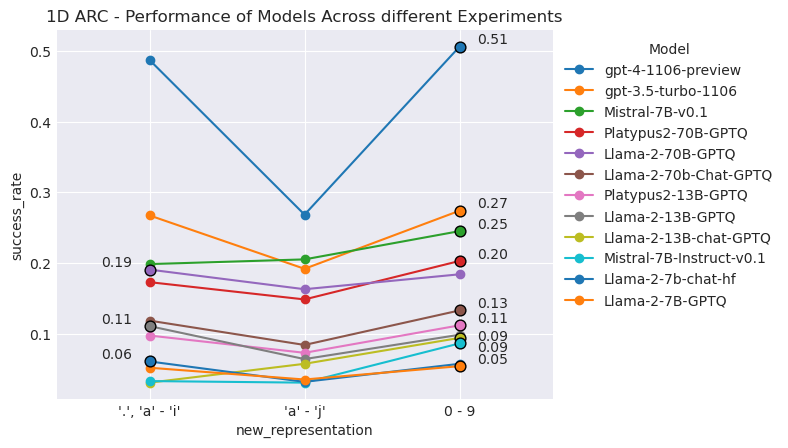

In [96]:
df = pd.read_csv("/work/jbriem/repos/master_thesis/results/baseline_naive/arc_1D/summary.csv")
plot_model_performance_across_runs(df, "new_representation", "success_rate", task="1D ARC")

/tmp/ipykernel_2886940/370855066.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


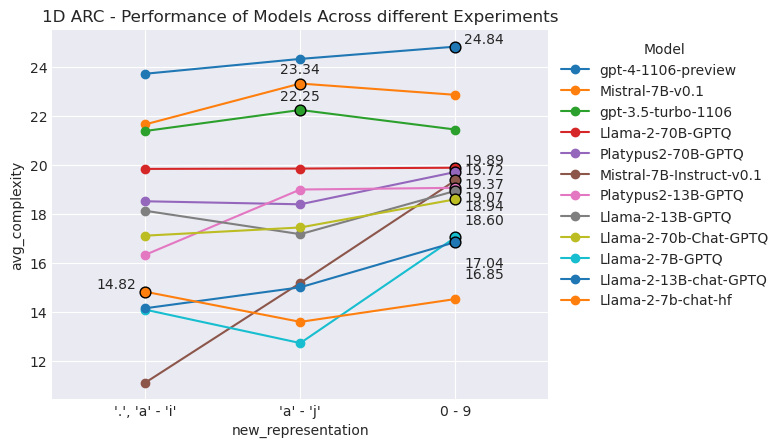

In [97]:
df = pd.read_csv("/work/jbriem/repos/master_thesis/results/baseline_naive/arc_1D/summary.csv")
plot_model_performance_across_runs(df, "new_representation", "avg_complexity", task="1D ARC")

### ARC H vs V

In [33]:
df = pd.read_csv("/work/jbriem/repos/master_thesis/results/baseline_naive/arc_h_v/summary.csv")
plot_model_performance_across_runs(df, "new_representation", "success_rate", task="ARC H vs V")

FileNotFoundError: [Errno 2] No such file or directory: '/work/jbriem/repos/master_thesis/results/baseline_naive/arc_h_v/summary.csv'

### ARC original

/tmp/ipykernel_2886940/1542910496.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


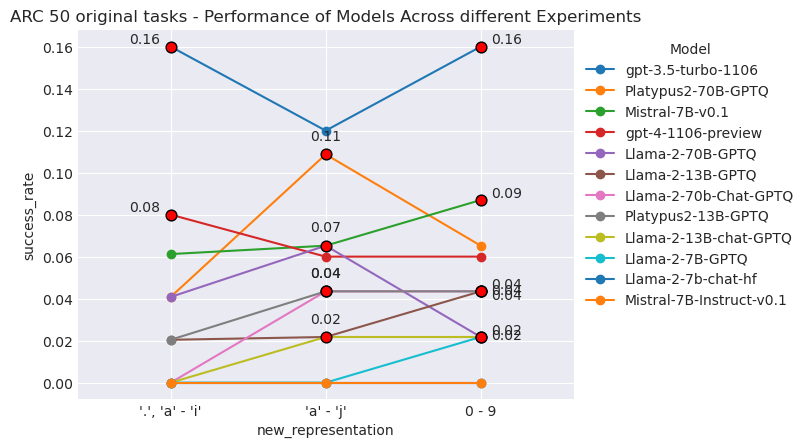

In [48]:
df = pd.read_csv("/work/jbriem/repos/master_thesis/results/baseline_naive/arc/summary.csv")
plot_model_performance_across_runs(df, "new_representation", "success_rate", task="ARC 50 original tasks")